In [1]:
library(Seurat)
library(plyr)
library(dplyr)
#library(reticulate)
#library(Matrix)
library(stringr)
library(reshape2)
library(ggplot2)
library(biomaRt)
library(tidyr)

options(repr.plot.width=10, repr.plot.height=10)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




In [2]:
setwd('/home/jovyan/data/GCA/stats/')
bpi<-read.csv('53BP1_foci.csv')

In [3]:
bpi<-melt(bpi)

No id variables; using all as measure variables



In [4]:
colnames(bpi)<-c('condition','count')

In [5]:
unique(bpi$condition)

[1] GM.only        Mononucleated  Multinucleated
Levels: GM.only Mononucleated Multinucleated

In [6]:
bpi$condition<-factor(bpi$condition, levels = rev(c('GM.only', 'Mononucleated', 'Multinucleated')))

Saving 6.67 x 6.67 in image



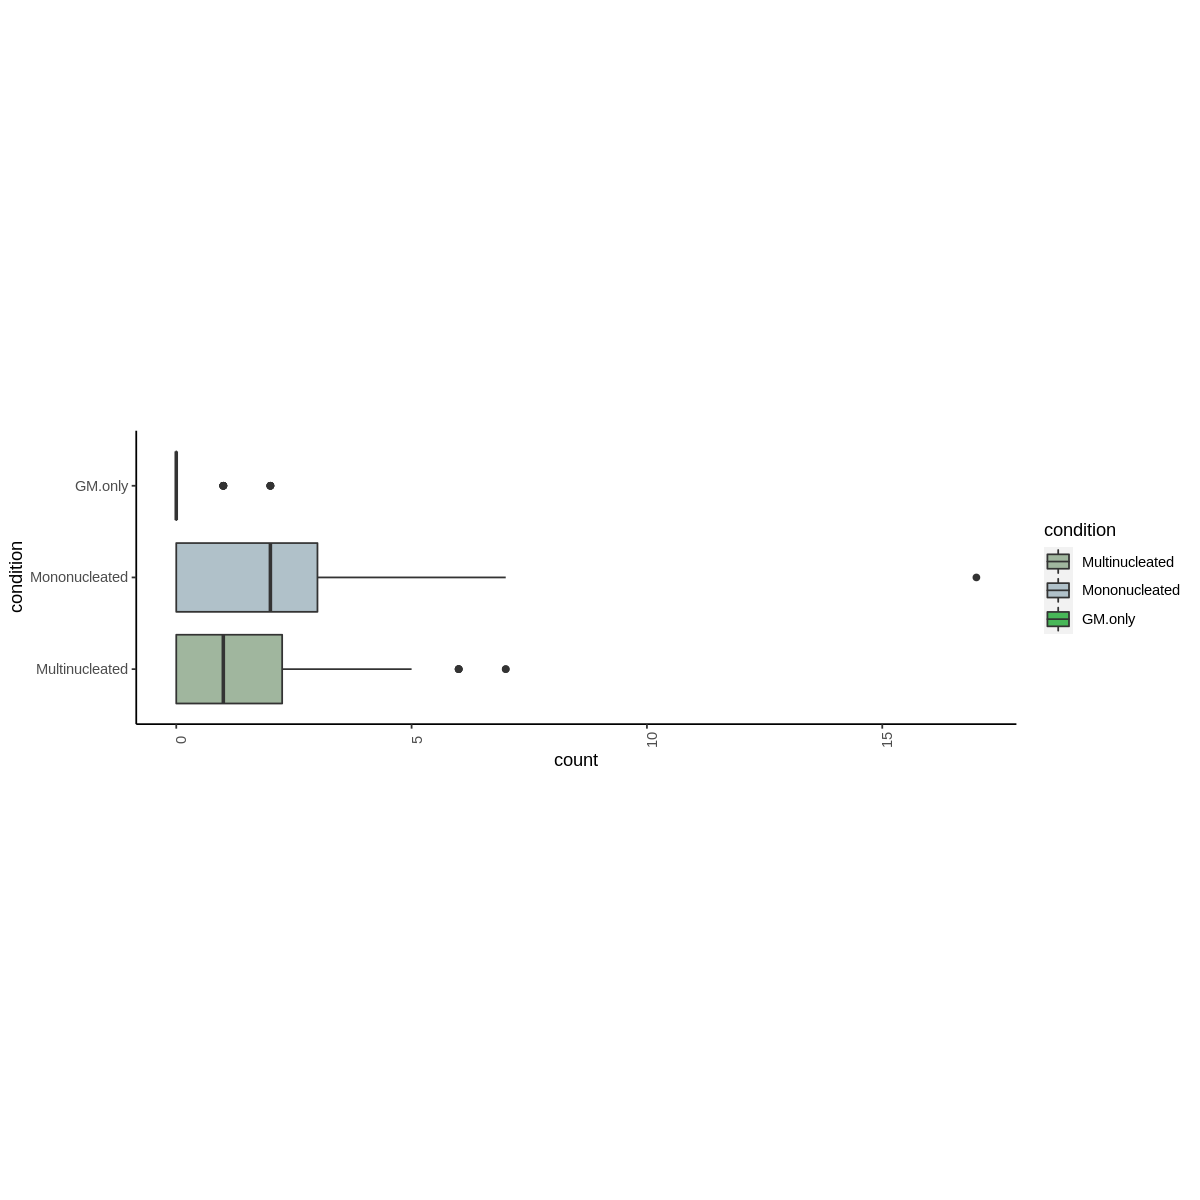

In [29]:
ggplot(bpi, aes(condition, count, fill = condition))+
geom_boxplot()+ 
scale_fill_manual(values = rev(c( '#48B758', '#B0C1C9', '#A0B69E')))+
theme(axis.text.x = element_text(angle = 90))+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+coord_flip()+
theme(aspect.ratio = 1/3)

setwd('/home/jovyan/data/GCA/figures')
ggsave('53bpi_loci.png', dpi = 300)

In [8]:
res.aov <- aov(count ~ condition, data = bpi)

In [9]:
summary(res.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
condition     2  145.6    72.8   19.14 2.46e-08 ***
Residuals   201  764.4     3.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [10]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = count ~ condition, data = bpi)

$condition
                                   diff        lwr        upr     p adj
Mononucleated-Multinucleated  0.3088235 -0.4808884  1.0985354 0.6261686
GM.only-Multinucleated       -1.6176471 -2.4073590 -0.8279352 0.0000078
GM.only-Mononucleated        -1.9264706 -2.7161825 -1.1367587 0.0000001
